In [11]:
import pandas as pd
from sqlalchemy import create_engine
sqlstring='SELECT [Town/City], District, strftime("%Y",DateofTransfer)as Year FROM "table"  WHERE Cast(Year as int)== 1996 '
#there's a / in a colum name which makes selecting the columns in this thing a pita
csv_database = create_engine('sqlite:///csv_database.db')
df = pd.read_sql_query(sqlstring, csv_database)
df=df.set_index('Town/City')

#print(df)
#print(df.iloc[3])
#print(df.loc[:,['Price','District','DateofTransfer']])
#WHERE date(DateofTransfer) == date(1995-12-21)

In [22]:

londists=df.loc['LONDON',"District"].values

In [23]:
set(londists)

{'BARKING AND DAGENHAM',
 'BARNET',
 'BEXLEY',
 'BRENT',
 'BROMLEY',
 'CAMDEN',
 'CITY OF LONDON',
 'CITY OF WESTMINSTER',
 'CROYDON',
 'EALING',
 'ENFIELD',
 'EPPING FOREST',
 'GREENWICH',
 'HACKNEY',
 'HAMMERSMITH AND FULHAM',
 'HARINGEY',
 'HARROW',
 'HAVERING',
 'HILLINGDON',
 'HOUNSLOW',
 'ISLINGTON',
 'KENSINGTON AND CHELSEA',
 'KINGSTON UPON THAMES',
 'LAMBETH',
 'LEWISHAM',
 'MERTON',
 'NEWHAM',
 'REDBRIDGE',
 'RICHMOND UPON THAMES',
 'SOUTHWARK',
 'TOWER HAMLETS',
 'WALTHAM FOREST',
 'WANDSWORTH'}

In [96]:
import pickle
geolocations = pickle.load( open( "cities.pkl", "rb" ) )
cleangeolocations = pickle.load( open( "citiesnopunc.pkl", "rb" ) )

In [97]:
#The City and District columns are not consistent. In large cities district means the district within that city, in small towns district means county, We want the most accurate of the two this 
#methos picks district where that is more accurate.
import string as stringlib
largecities=["London" ,"Birmingham","Glasgow","Leeds,Bristol"," Liverpool","Manchester", "Sheffield","Edinburgh", "Cardiff" , "Leicester"
 "Stoke-on-Trent", "Bradford", " Coventry", "Nottingham","Kingston-upon-Hull","Belfast","Newcastle-upon-Tyne"]

def clean_string(string):
 for char in stringlib.punctuation:
     string = string.replace(char,'').replace(' ', '')
 return string.upper()

largecities=list(map(clean_string,largecities))
print(largecities)

['LONDON', 'BIRMINGHAM', 'GLASGOW', 'LEEDSBRISTOL', 'LIVERPOOL', 'MANCHESTER', 'SHEFFIELD', 'EDINBURGH', 'CARDIFF', 'LEICESTERSTOKEONTRENT', 'BRADFORD', 'COVENTRY', 'NOTTINGHAM', 'KINGSTONUPONHULL', 'BELFAST', 'NEWCASTLEUPONTYNE']


In [98]:
locations=df.iloc[:,0]
plotdata=locations.map(geolocations).tolist()
fplotdata=list(filter(lambda x:type(x)==tuple,plotdata))
print(len(plotdata))
print(len(fplotdata)-len(plotdata))

964695
-20375


In [99]:
cleanlocations=locations.map(clean_string)

cleanplotdata=cleanlocations.map(cleangeolocations).tolist()
cleanfplotdata=list(filter(lambda x:type(x)==tuple,cleanplotdata))
print(len(cleanplotdata))
print(len(cleanfplotdata)-len(cleanplotdata))


964695
0


In [100]:
import numpy as np
geofailindices=(np.where(pd.isnull(plotdata))[0]).tolist()
print(len(set(locations.loc[geofailindices])))

cleangeofailindices=(np.where(pd.isnull(cleanplotdata))[0]).tolist()
print(len(set(cleanlocations.loc[cleangeofailindices])))

33
0


In [9]:
#print(set(locations.loc[geofailindices]))
print(set(cleanlocations.loc[cleangeofailindices]))

set()


In [69]:
df.Price.values.max()

12400000

In [101]:
y  =[cpd[0] for cpd in cleanplotdata]
x=[cpd[1] for cpd in cleanplotdata]

In [43]:
type(x)

list

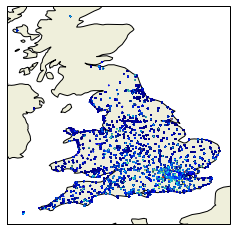

In [102]:

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors


land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])


cmap = plt.cm.jet
norm = matplotlib.colors.LogNorm(vmin=50000,vmax=740000)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
ax.add_feature(land_50m)
ax.scatter(x,y,color=cmap(norm(df.Price.values)),s=0.3, zorder=10)

plt.show()

In [84]:

norm(2000000)

0.3692022263450835